# Principal Component Analysis with Cancer Data

In [22]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
tumor = pd.read_csv("F:/dinesh/Great Lakes/Machine learning/Python/Lab/5th Residency/Internal Lab/tumor.csv")
tumor.head(10)

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
tumor.dtypes
tumor.shape
tumor.describe()
print("Looks oultiers are found and they are right skewed for almost all columns as 75% and max looks long")

ID                              int64
ClumpThickness                  int64
Cell_Size                       int64
Cell_Shape                      int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Normal_Nucleoli                 int64
Bland_Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

(699, 11)

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Looks oultiers are found and they are right skewed for almost all columns as 75% and max looks long


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [5]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
tumor.isna().sum()

ID                             0
ClumpThickness                 0
Cell_Size                      0
Cell_Shape                     0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Normal_Nucleoli                0
Bland_Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
tumor['Bare_Nuclei'][tumor["Bare_Nuclei"]=='?'].count()
tumor['Bare_Nuclei'] = tumor['Bare_Nuclei'].replace(['?'], 0)
tumor[tumor["Bare_Nuclei"]=='?']

16

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class


In [7]:
tumor.head()

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [9]:
# Check for correlation of variable
tumor.corr()
independent_dependent = tumor.corr()["Class"]
independent_independent = tumor.drop("Class",axis =1).corr()
independent_dependent
independent_independent

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Normal_Nucleoli,Bland_Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Normal_Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Bland_Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


ID                            -0.080226
ClumpThickness                 0.716001
Cell_Size                      0.817904
Cell_Shape                     0.818934
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Normal_Nucleoli                0.756616
Bland_Chromatin                0.712244
Mitoses                        0.423170
Class                          1.000000
Name: Class, dtype: float64

,ID,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Normal_Nucleoli,Bland_Chromatin,Mitoses
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034
Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693
Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633
Single_Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101
Normal_Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169
Bland_Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000


In [10]:
print("No correlation in range -0.1 to 0.1, No weak Correlation found bwetween dependent qand independent")


No correlation in range -0.1 to 0.1, No weak Correlation found bwetween dependent qand independent


In [11]:
for l, l_val in enumerate (independent_independent.columns):
    for k, values in enumerate(independent_independent.iloc[:,l]):
        if values > 0.79:
            print(independent_independent.index[k],"-",l_val,"-", independent_independent.iloc[k,l])
print("we can ignore those with same feature comparision = 1")            
print("The above features looks to be simillar as there is high correlation  > 0.79, Further more detailes analyis needs to be done with business team how to handle it")



ID - ID - 1.0
ClumpThickness - ClumpThickness - 1.0
Cell_Size - Cell_Size - 1.0
Cell_Shape - Cell_Size - 0.9068819130526037
Cell_Size - Cell_Shape - 0.9068819130526037
Cell_Shape - Cell_Shape - 1.0
Marginal_Adhesion - Marginal_Adhesion - 1.0
Single_Epithelial_Cell_Size - Single_Epithelial_Cell_Size - 1.0
Normal_Nucleoli - Normal_Nucleoli - 1.0
Bland_Chromatin - Bland_Chromatin - 1.0
Mitoses - Mitoses - 1.0
we can ignore those with same feature comparision = 1
The above features looks to be simillar as there is high correlation  > 0.79, Further more detailes analyis needs to be done with business team how to handle it


C:\Users\2124718\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\2124718\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\2124718\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


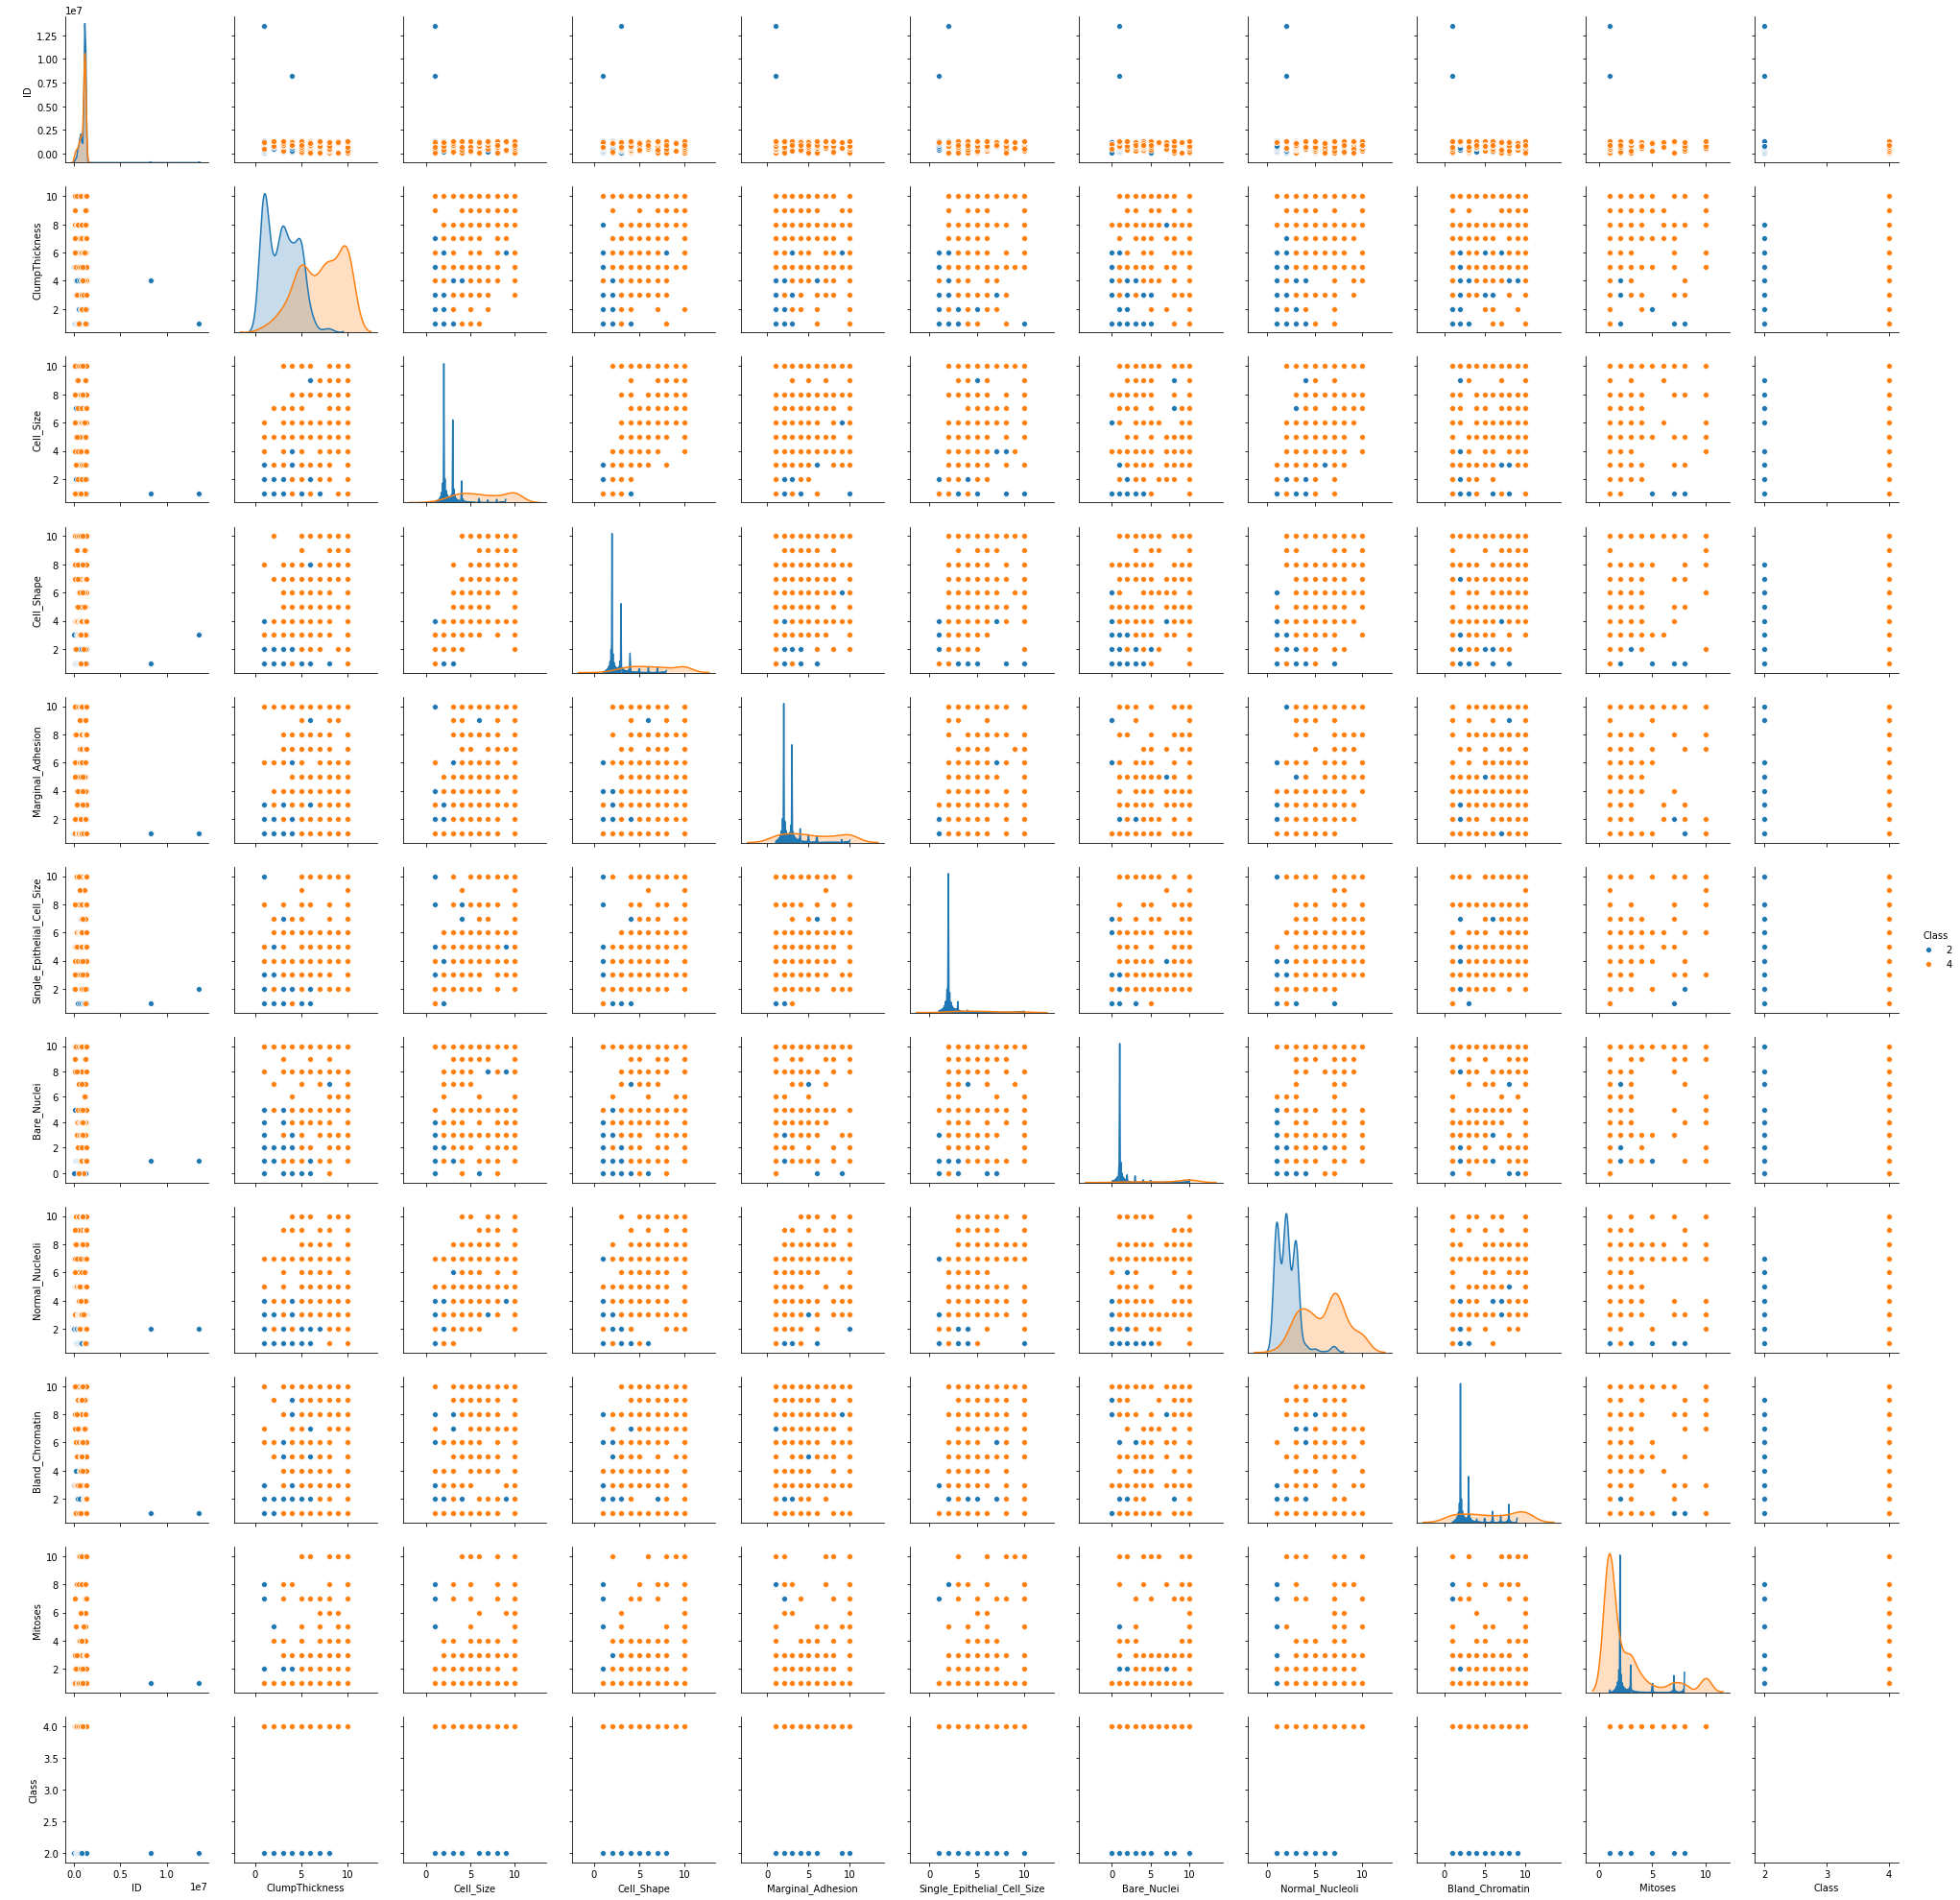

In [12]:
tumor["Bare_Nuclei"] = tumor["Bare_Nuclei"].astype(np.int64)
sns.pairplot(tumor,diag_kind = 'kde',hue = 'Class')

In [13]:
print('kde shows clump thickness and Normal Nucleoi, helps in better predicting class as both class are seprated in better way')
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

kde shows clump thickness and Normal Nucleoi, helps in better predicting class as both class are seprated in better way


In [14]:
#Let us check for pair plots

In [15]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [16]:
# We could see most of the outliers are now removed.

In [17]:
print("Cant infer column as unwanted though ouliers were present, Need domain expert to understand the columns are real ouliers")
print("scaling the data")
tumor_target = tumor["Class"]
tumor = tumor.drop(labels = ["ID","Class"], axis = 1)
tumor = tumor.apply(zscore)



Cant infer column as unwanted though ouliers were present, Need domain expert to understand the columns are real ouliers
scaling the data


In [18]:
tumor.columns

Index(['ClumpThickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Normal_Nucleoli',
       'Bland_Chromatin', 'Mitoses'],
      dtype='object')

# Q6 Create a covariance matrix for identifying Principal components

In [19]:
# PCA
# Step 1 - Create covariance matrix


In [67]:
#.cov()
cov_mat = np.cov(tumor.T)




# Q7 Identify eigen values and eigen vector

In [21]:
# Step 2- Get eigen values and eigen vector

In [68]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.30292446 -0.14728724  0.00171985 -0.86193801 -0.07974264  0.07647456
  -0.24290868  0.26773717  0.02660985]
 [-0.38127363 -0.04994886  0.73632898  0.0207124   0.20267222 -0.13753297
   0.4391189   0.12149144 -0.20481512]
 [-0.37760282 -0.08532737 -0.66500091 -0.03317637  0.176675   -0.10499726
   0.58493756  0.05060655 -0.14091492]
 [-0.33292274 -0.04501348 -0.04612047  0.41972041 -0.46800847  0.04604803
  -0.12290104  0.67131862  0.14804802]
 [-0.33653384  0.1633891  -0.06807047  0.11175896  0.36301869 -0.68838416
  -0.45009176 -0.05203136  0.17882994]
 [-0.33285064 -0.24637458  0.07092611 -0.00913366 -0.55271696 -0.13055944
   0.10967743 -0.60469376  0.3509567 ]
 [-0.34597842 -0.22997335 -0.05811865  0.19829425 -0.0033783   0.25734531
  -0.41000684 -0.25652337 -0.69610698]
 [-0.33586575  0.02525521  0.01901354  0.13438809  0.45696771  0.62219668
  -0.07981509 -0.09793341  0.50618683]
 [-0.22998763  0.90861576 -0.00774395 -0.09702428 -0.23708563  0.13348277
   0.042

# Q8 Find variance and cumulative variance by each eigen vector

In [69]:
eig_vals.sum()
for i in range(len(eig_vals)):
    print((eig_vals[i]/eig_vals.sum()))

print("cumulative variance")

h =0

for i in range(len(eig_vals)):
    h += ((eig_vals[i]/eig_vals.sum()))
    print(h)


9.012893982808029

0.6541194019066467
0.08601493923460626
0.009879068950853926
0.05987118790366039
0.05198204902416877
0.04231196825510664
0.02909155536540809
0.033796195726613326
0.03293363363293601
cumulative variance
0.6541194019066467
0.740134341141253
0.7500134100921069
0.8098845979957673
0.8618666470199361
0.9041786152750427
0.9332701706404508
0.9670663663670641
1.0000000000000002


array([5.89550882, 0.77524353, 0.53961267, 0.4685087 , 0.38135328,
       0.30460153, 0.29682735, 0.2621991 , 0.089039  ])

array([0.6541194 , 0.74013434, 0.80000553, 0.85198758, 0.89429955,
       0.92809574, 0.96102938, 0.99012093, 1.        ])

array([[ 0.30292446,  0.38127363,  0.37760282,  0.33292274,  0.33653384,
         0.33285064,  0.34597842,  0.33586575,  0.22998763],
       [-0.14728724, -0.04994886, -0.08532737, -0.04501348,  0.1633891 ,
        -0.24637458, -0.22997335,  0.02525521,  0.90861576],
       [-0.86193801,  0.0207124 , -0.03317637,  0.41972041,  0.11175896,
        -0.00913366,  0.19829425,  0.13438809, -0.09702428],
       [-0.07974264,  0.20267222,  0.176675  , -0.46800847,  0.36301869,
        -0.55271696, -0.0033783 ,  0.45696771, -0.23708563],
       [-0.07647456,  0.13753297,  0.10499726, -0.04604803,  0.68838416,
         0.13055944, -0.25734531, -0.62219668, -0.13348277],
       [ 0.26773717,  0.12149144,  0.05060655,  0.67131862, -0.05203136,
        -0.60469376, -0.25652337, -0.09793341, -0.12872425],
       [-0.02660985,  0.20481512,  0.14091492, -0.14804802, -0.17882994,
        -0.3509567 ,  0.69610698, -0.50618683,  0.14009519],
       [ 0.24290868, -0.4391189 , -0.58493756,  0.12290104,  0

Normalised eigen vector


<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Total explained variance')

(0, 63)

([<matplotlib.axis.YTick at 0x525ad68>,
 <a list of 11 Text yticklabel objects>)

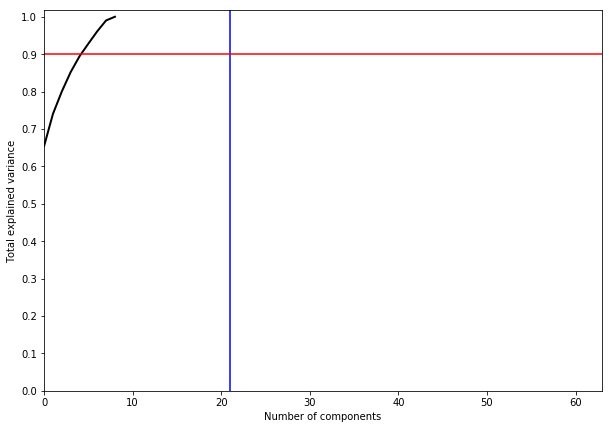

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [70]:
X_centered = tumor - tumor.mean(axis=0)
pca = PCA().fit(X_centered)
pca.explained_variance_
np.cumsum(pca.explained_variance_ratio_)
pca.components_
print("Normalised eigen vector")

array([5.89550882, 0.77524353, 0.53961267, 0.4685087 , 0.38135328,
       0.30460153, 0.29682735, 0.2621991 , 0.089039  ])

array([0.6541194 , 0.74013434, 0.80000553, 0.85198758, 0.89429955,
       0.92809574, 0.96102938, 0.99012093, 1.        ])

array([[ 0.30292446,  0.38127363,  0.37760282,  0.33292274,  0.33653384,
         0.33285064,  0.34597842,  0.33586575,  0.22998763],
       [-0.14728724, -0.04994886, -0.08532737, -0.04501348,  0.1633891 ,
        -0.24637458, -0.22997335,  0.02525521,  0.90861576],
       [-0.86193801,  0.0207124 , -0.03317637,  0.41972041,  0.11175896,
        -0.00913366,  0.19829425,  0.13438809, -0.09702428],
       [-0.07974264,  0.20267222,  0.176675  , -0.46800847,  0.36301869,
        -0.55271696, -0.0033783 ,  0.45696771, -0.23708563],
       [-0.07647456,  0.13753297,  0.10499726, -0.04604803,  0.68838416,
         0.13055944, -0.25734531, -0.62219668, -0.13348277],
       [ 0.26773717,  0.12149144,  0.05060655,  0.67131862, -0.05203136,
        -0.60469376, -0.25652337, -0.09793341, -0.12872425],
       [-0.02660985,  0.20481512,  0.14091492, -0.14804802, -0.17882994,
        -0.3509567 ,  0.69610698, -0.50618683,  0.14009519],
       [ 0.24290868, -0.4391189 , -0.58493756,  0.12290104,  0

Normalised eigen vector


In [72]:
X_pca = pca.transform(X_centered)

<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Total explained variance')

(0, 63)

([<matplotlib.axis.YTick at 0x13677470>,
 <a list of 11 Text yticklabel objects>)

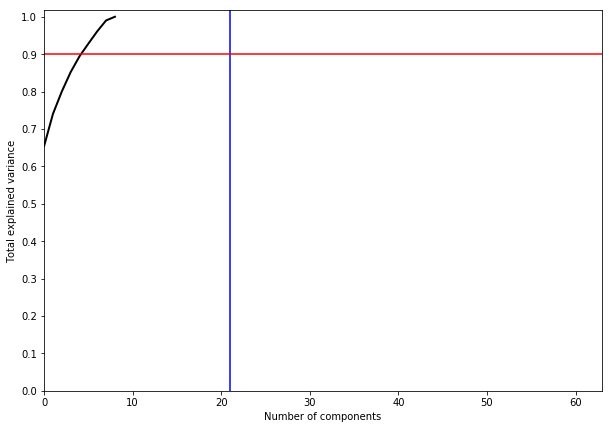

In [71]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axhline(0.9, c='r')

plt.show()

# Q10 Find correlation between components and features

In [75]:
pd.DataFrame(pca.components_,columns = tumor.columns).corr()

,ClumpThickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Normal_Nucleoli,Bland_Chromatin,Mitoses
ClumpThickness,1.000000,0.061779,-0.022175,0.034725,0.096124,-0.063152,0.037163,-0.007397,0.027276
Cell_Size,0.061779,1.000000,0.085491,-0.133873,-0.370578,0.243464,-0.143271,0.028519,-0.105156
Cell_Shape,-0.022175,0.085491,1.000000,0.048053,0.133018,-0.087390,0.051426,-0.010237,0.037745
Marginal_Adhesion,0.034725,-0.133873,0.048053,1.000000,-0.208297,0.136848,-0.080530,0.016030,-0.059107
Single_Epithelial_Cell_Size,0.096124,-0.370578,0.133018,-0.208297,1.000000,0.378811,-0.222918,0.044373,-0.163615
Bare_Nuclei,-0.063152,0.243464,-0.087390,0.136848,0.378811,1.000000,0.146454,-0.029152,0.107493
Normal_Nucleoli,0.037163,-0.143271,0.051426,-0.080530,-0.222918,0.146454,1.000000,0.017155,-0.063256
Bland_Chromatin,-0.007397,0.028519,-0.010237,0.016030,0.044373,-0.029152,0.017155,1.000000,0.012591
Mitoses,0.027276,-0.105156,0.037745,-0.059107,-0.163615,0.107493,-0.063256,0.012591,1.000000


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [93]:
jokes = pd.read_excel("F:/dinesh/Great Lakes/Machine learning/Python/Lab/5th Residency/Internal Lab/jokes.xlsx",header = None)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [103]:
jokes.head()
jokes_orig = jokes

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
1,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,...,2.82,99,99,99,99,99,-5.63,99,99,99
2,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
3,49,99,99,99,99,9.03,9.27,9.03,9.27,99,...,99,99,99,9.08,99,99,99,99,99,99
4,48,99,8.35,99,99,1.8,8.16,-2.82,6.21,99,...,99,99,99,0.53,99,99,99,99,99,99


In [104]:
jokes_orig = jokes_orig.iloc[:,1:]
jokes_orig = jokes_orig.iloc[1:201,:]

In [107]:
jokes_orig.shape
jokes_orig.head()

(200, 100)

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
1,-7.82,8.79,-9.66,-8.16,-7.52,-8.5,-9.85,4.17,-8.98,-4.76,...,2.82,99,99,99,99,99,-5.63,99,99,99
2,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
3,99,99,99,99,9.03,9.27,9.03,9.27,99,99,...,99,99,99,9.08,99,99,99,99,99,99
4,99,8.35,99,99,1.8,8.16,-2.82,6.21,99,1.84,...,99,99,99,0.53,99,99,99,99,99,99
5,8.5,4.61,-4.17,-5.39,1.36,1.6,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.8,1.6


# Q22 Change the column indices from 0 to 99

In [108]:
print("All changes done above")

All changes done above


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [110]:
jokes_orig.replace(99.00, 0,inplace = True)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [111]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ratings_diff=sc.fit_transform(jokes_orig)


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [119]:
pd.DataFrame(ratings_diff).mean().nlargest(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64